# VERİ BİLİMİ İÇİN PYTHON ve TENSORFLOW EĞİTİMİ UYGULAMALARI

In [115]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt

In [116]:
df = pa.read_excel("merc.xlsx")

In [117]:
df.head()#Verinin neye benzediğine bakmak için...

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [118]:
df.count()#Verinin satır sayısına bakmak için

year            13119
price           13119
transmission    13119
mileage         13119
tax             13119
mpg             13119
engineSize      13119
dtype: int64

In [119]:
print(df.isnull().loc[2])
print(type(df.isnull().loc[2]))

year            False
price           False
transmission    False
mileage         False
tax             False
mpg             False
engineSize      False
Name: 2, dtype: bool
<class 'pandas.core.series.Series'>


In [120]:
#Boş hücre olup, olmadığına bakmanın en kısa yollarından ikisi şudur:
df.isnull().sum()
#df[df.isnull()].dropna().count()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [121]:
#Bu da uzun yöntemi:
check = df.isnull()
falseCount = 0
sayac = 0
while sayac < df.count()[0]:
    for i in check.loc[sayac]:
        if i == False:
            falseCount += 1
    sayac += 1

print("Boş hücre sayısı : " + str(falseCount))
print(f"Döngü çalışma adedi:{sayac}")

Boş hücre sayısı : 91833
Döngü çalışma adedi:13119


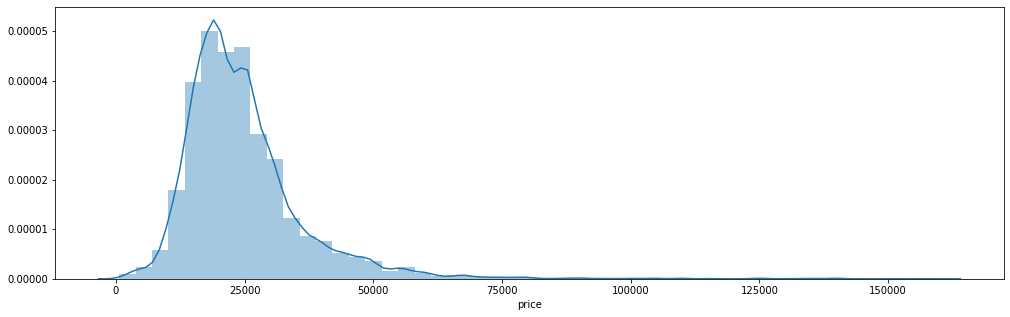

In [122]:
#Şimdi verinin dağılımına bakıp, aykırı verileri tespit edelim:
#Bunun için seaborn kütüphânesini kullanalım:
import seaborn as sbn
import matplotlib.pyplot as pt
pt.figure(figsize=(17,5))
sbn.distplot(df["price"])

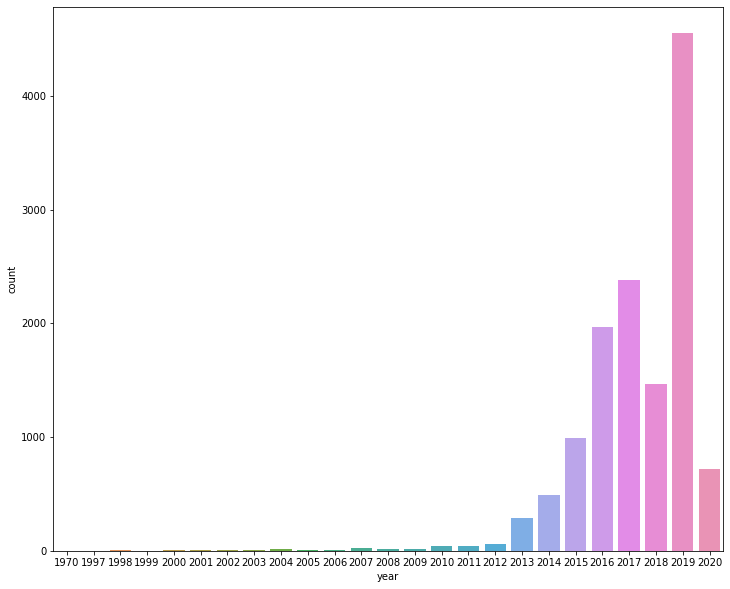

In [123]:
#Görüldüğü üzere verinin bir kısmı normal dağılıma sâhip; fakat grafiğin sağ tarafında görüleceği üzere..
#..veride anormal veriler var
#Çok pahalı arabalar yüzünden modelimiz 'bozuk' olabilir; bu çok pahalı arabalardan veri setini ayırarak modelin..
#.. performansını arttırmaya çalışmalıyız.


#Veri setinin homojen olması modelin başarısı açısından çok önemlidir.
#Hattâ Geron'un kitâbında verinin, makine öğrenmesi algoritmasından daha önemli olabildiğine dair iktibas..
#yer almaktadır. Veri setinin problemi tanımlamada homojen ve yeterli olduğu durumda birçok makine öğrenim algoritmasının..
#..yaklaşık performans gösterdiği söylenmiştir.
#O sebeple algoritmadaki özelliklerin dağılımına göz atmak gerekir; fakat yapay sinir ağında özelliklerin ağırlıkları..
#olduğundan bu çok sıkıntı olmaz
#Veri setinde hangi yıldan kaç otomobil var, bakalım
plt.figure(figsize=(12,10))
sbn.countplot(df["year"])

In [124]:
#Görüleceği üzere bâzı çok eski arabalar var; bunları kaldırmak algoritmanın performansını arttırabilir.
#Değişkenler arasındaki korelasyona bakalım:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


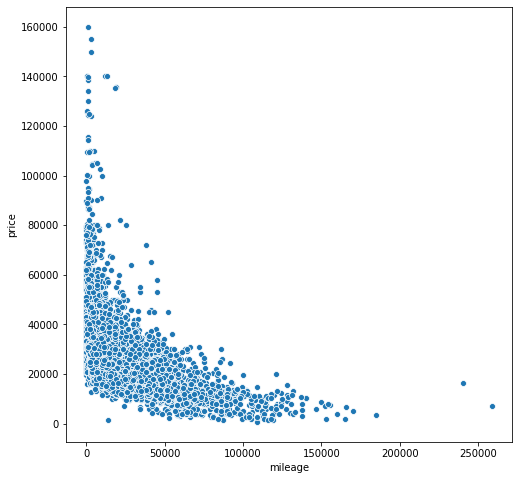

In [125]:
#Korelasyonda 'price' sütununu çok çok yüksek düzeyde etkileyen bir sütun veya çok az düzeyde etkileyen bir sütun yok
#Korelasyondaki dağılımlar normal gibi görünüyor

#Şimdi korelasyonu düşük olan ve yüksek olan verilerin fiyat üzerindeki dağılımına bakarak aykırılıkları araştırmaya..
#..devam edelim:
#Dağılım grafiği çizilirken 'y' sütununu bağımlı değişken olarak yazmalıyız
plt.figure(figsize=(8,8))
sbn.scatterplot(x= 'mileage', y ='price', data = df)

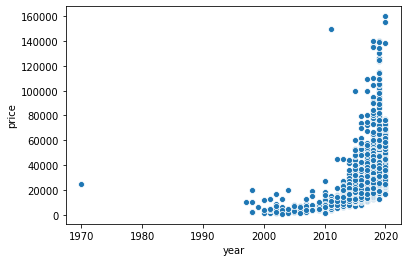

In [126]:
#Diğer sütunlar için de bakalım:
sbn.scatterplot(x= 'year', y ='price', data = df)

In [127]:
#Şimdi tespit ettiğimiz aykırı değerlere daha yakından bakalım:
#Çok pahalı arabaları sıralayalım (ilk 10 tânesi için):
df.sort_values('price', ascending = False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [128]:
#Çok ucuz araçlara bakalım:
df.sort_values('price', ascending = True).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [129]:
#En yüksek arabaları atalım.

#Burada çok yüksek fiyatlı arabalardan kaç tane olduğunu her 1000 pound'luk dilim için bakarak, kaç tânesini atmamız..
#..gerektiği hakkında yorum yapabiliriz; bunu 'seaborn' ile de yapabiliriz; veyâ bunun için bir kod da yazabiliriz
#Eğer kısa bir yol istiyorsak arabaların en yüksek %1'lik dilimini verilerden çıkarabiliriz:
numberForExtracting = len(df) * 0.01
df = df.sort_values("price", ascending=False).iloc[int(numberForExtracting):]
print("En yüksek " + str(int(numberForExtracting)) + " araba çıkarıldı")

En yüksek 131 araba çıkarıldı


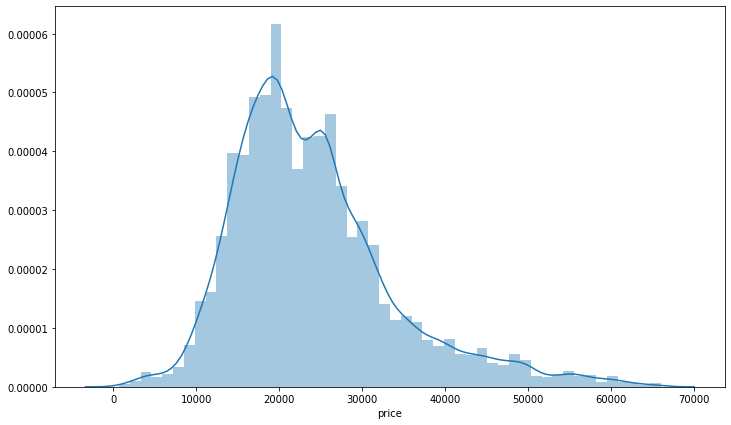

In [130]:
#Şimdi dağılıma bakalım:
plt.figure(figsize=(12,7))
sbn.distplot(df["price"])

In [131]:
#Şimdi dağılım daha normal hâle geldi

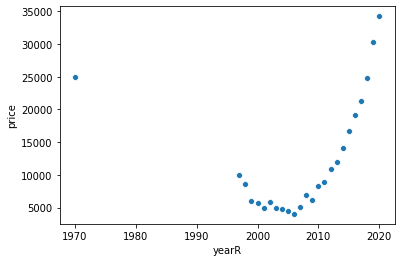

In [132]:
#Verileri bâzı sütunlara göre (korelasyon değeri yüksek olan sütunlar) gruplayıp, grupların ortalama fiyatlarına bakalım:
grupYear = df.groupby("year").mean()
#Yıla göre grupladığımız için sütunlar içerisinde yıl yok; onu ekleyip, yıla göre dağılımlarına bakalım:
dizi = grupYear.index.to_numpy()
grupYear["yearR"] = dizi
sbn.scatterplot(x = "yearR", y = 'price', data = grupYear)

In [133]:
#Görüleceği üzere 2000'li yıllardan biraz öncesindeki arabaların fiyatları biraz yüksekmiş; seyreden yıllarda fiyatlar..
#..düşerken takriben 2007 sonrasında fiyatlar yıl ile doğrusal bir ilişki içerisinde olmuş.
#2000'li yıllardan biraz önceki arabaların pahalı olmasının belki bir sebebi vardır, fakat 1970 modelindeki bir arabanın..
#..2019 model bir arabayla aynı fiyatta olması oldukça garip bir durum. O yüzden bu arabaya yakından bakalım:
grupYear.sort_values("year", ascending=True)

,price,mileage,tax,mpg,engineSize,yearR
year,,,,,,
1970,24999.000000,14000.000000,305.000000,39.200000,0.000000,1970
1997,9995.000000,76000.000000,255.000000,28.200000,3.200000,1997
1998,8605.000000,76347.750000,262.500000,28.925000,3.450000,1998
1999,5995.000000,34000.000000,145.000000,24.600000,3.200000,1999
2000,5743.333333,89648.666667,268.333333,26.333333,3.200000,2000
2001,4957.900000,72955.100000,347.500000,28.140000,2.870000,2001
2002,5820.444444,57391.111111,350.555556,27.877778,3.522222,2002
2003,4878.000000,88777.714286,300.000000,29.485714,3.028571,2003
2004,4727.615385,94363.461538,312.307692,31.838462,2.530769,2004


In [134]:
#Görüldüğü üzere 1970 model arabanın fiyatının yüksek olmasının sebebi böyle bir araba olmaması olabilir; zîrâ arabanın..
#motor büyüklüğü 0.0 gözüküyor
#Böyle başka araba var mı, bakalım:
df["engineSize"].sort_values(ascending = True)

10815    0.0
9621     0.0
12072    0.0
9650     0.0
9654     0.0
        ... 
11580    6.2
11923    6.2
12770    6.2
3280     6.2
11997    6.2
Name: engineSize, Length: 12988, dtype: float64

In [135]:
zeroMotor = df["engineSize"].sort_values(ascending = True).iloc[:20]
zeroMotorIndex = zeroMotor[zeroMotor == 0.0].index

In [136]:
print("0.0 motor hacmine sâhip araçların veri setindeki sıra numaraları:")
for say in zeroMotorIndex:
    print(say)
print("0.0 motor hacmine sâhip toplam araç sayısı : " + str(len(zeroMotorIndex)))

0.0 motor hacmine sâhip araçların veri setindeki sıra numaraları:
10815
9621
12072
9650
9654
11183
9618
9619
10675
10739
11347
10710
0.0 motor hacmine sâhip toplam araç sayısı : 12


In [137]:
df = df.iloc[[i for i in range(0, len(df)) if i not in(list(zeroMotorIndex))]]

In [138]:
len(df)

12976

Görüldüğü üzere 12 tâne verimiz çıkartıldı

In [139]:
print(str(df["transmission"].nunique()) + " farklı vites tipi var")

4 farklı vites tipi var


Bu vites tiplerini 0 ve 1 olarak kodlayamayız; çünkü 4 çeşitler
Bunları 0, 1, 2, 3 olarak kodlarsak modelimiz bu vites tipleri arasında büyüklük olduğunu düşünecek ve öyle değerlendirecek
Her ne kadar otomatik vites, yarı otomatikten, yarı otomatik vites manuel vitesten daha konforlu olsa da bunların araç fiyatı üzerindeki etkisinin bu büyüklük sırasına göre olduğu hükmünü yalnız bu veriyle yapamayız

Bunu yapan bir fonksiyon kısa sürede yazılabilir; fakat ben hızlı olmak için sklearn'ün fonksiyonunu kullanmak istiyorum:

In [140]:
from sklearn.preprocessing import OneHotEncoder

In [141]:
indexOfTransmissionCol = -1
for i in range(0, len(df.columns)):
    if df.columns[i] == "transmission":
        indexOfTransmissionCol = i
indexOfTransmissionCol

2

Vites tipi verisinin sütun numarası 2 imiş. Bu, 'iloc' özelliğini kullanarak veriyi alırken lazım

In [142]:
col = df.iloc[:, [2]] # Sütun numarasını dizi olarak değil, sadece sayı olarak verdiğimizde dönüş tipi 'Series' oluyor

In [143]:
oneHotEnc = OneHotEncoder()

fitTransformValues = oneHotEnc.fit_transform(col).toarray()
fitTransformValues

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [144]:
# 'transmission' sütununu kaldırıp, 4 sütundan oluşan fitTransformValues'u ekleyelim
values = df["transmission"].sort_values().unique()
dfWithTransmission = df.copy()
dfWithTransmission.drop("transmission", axis = 1, inplace = True)
sayac = 0
for i in values:
    dfWithTransmission[str(i)] = fitTransformValues[:,sayac].tolist()
    sayac += 1

In [145]:
# Veriler otomatik olarak noktalı sayıya çevrildiğinden int'a çevirmeliyiz:
typDict = dict()
for i in values:
    typDict[str(i)] = 'int32'
dfWithTransmission = dfWithTransmission.astype(typDict)

In [146]:
dfWithTransmission.corr()

,year,price,mileage,tax,mpg,engineSize,Automatic,Manual,Other,Semi-Auto
year,1.000000,0.591262,-0.737680,0.013455,-0.084767,-0.176478,-0.166401,-0.134063,-0.009931,0.245182
price,0.591262,1.000000,-0.596356,0.295754,-0.417231,0.425449,-0.026381,-0.309773,-0.010362,0.220672
mileage,-0.737680,-0.596356,1.000000,-0.158589,0.191232,0.101793,0.144926,0.169988,0.007513,-0.247011
tax,0.013455,0.295754,-0.158589,1.000000,-0.517692,0.346224,0.087793,-0.211644,0.001485,0.048451
mpg,-0.084767,-0.417231,0.191232,-0.517692,1.000000,-0.299692,-0.021303,0.098078,0.000882,-0.041193
engineSize,-0.176478,0.425449,0.101793,0.346224,-0.299692,1.000000,0.125650,-0.219201,-0.023333,0.017295
Automatic,-0.166401,-0.026381,0.144926,0.087793,-0.021303,0.125650,1.000000,-0.269371,-0.009455,-0.795140
Manual,-0.134063,-0.309773,0.169988,-0.211644,0.098078,-0.219201,-0.269371,1.000000,-0.004392,-0.369331
Other,-0.009931,-0.010362,0.007513,0.001485,0.000882,-0.023333,-0.009455,-0.004392,1.000000,-0.012964
Semi-Auto,0.245182,0.220672,-0.247011,0.048451,-0.041193,0.017295,-0.795140,-0.369331,-0.012964,1.000000


Tahmîn edilebilirdi, arabanın 'manuel' vites olması arabanın değerini düşüren bir şeymiş ve arabanın vites tipinin 'manuel' olmasının fiyat üzerindeki etkisi ~-0.31. Bu, gerçekten yüksek bir korelasyon değeri; fakat otomatik vitesin fiyat ile arasındaki korelasyon değeri ~-0.03! Bu çok ilginç bir durum! Arabanın manuel vites olup, olmaması özelliğinin fiyat üzerindeki etkisi arabanın otomatik vites olup olmaması özelliğinden yaklaşık 10 kat daha etkili duruyor. Aracın vites tipinin yarı otomatik olmasının fiyat üzerindeki etkisi ise ~0.22. Bunun neden böyle olduğunu anlamak için daha yakından bakmam gerektiğini düşündüm. Önce bir dağılıma bakalım. Tahmînimce veriler yarı - otomatik ve manuel vites tipli araçlardan oluşuyor

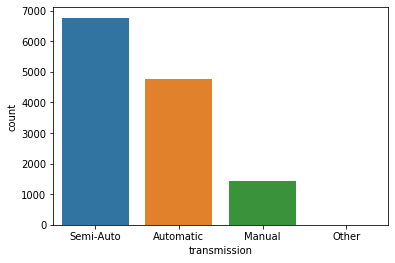

In [150]:
sbn.countplot(df["transmission"])

Yanılmışım! Evet, araçların önemli kısmı "yarı - otomatik" vitesli araçlar, fakat otomatik vitesli araç sayısı "manuel" vitesli araç sayısından daha fazla. Buraya anlam veremedim, ama yine de vites tipi sütunlarının hepsini birden çıkarmadan analiz yapmayı düşünüyorum. Belki en son korelasyon değeri düşük olan "otomatik" ve "diğer" vites tipini belirten sütunları çıkartıp, model başarısını yeniden ölçebilirim.

In [151]:
yValues = dfWithTransmission["price"].values
xValues = dfWithTransmission.drop("price", axis = 1).values

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
xTrain, xTest, yTrain, yTest = train_test_split(xValues,yValues, test_size=0.3, random_state=10) # random_state..
# .. rastgelelik numarasıdır. Şöyle ki, bu kodları bir daha çalıştırırken aynı indislerin eğitim ve test olarak ayrılması..
# .. nı sağlıyor

In [162]:
print("Eğitim veri setinde " + str(len(yTrain)) + " adet veri var.")

Eğitim veri setinde 9083 adet veri var.


In [163]:
print("Test veri setinde " + str(len(yTest)) + " adet veri var.")

Test veri setinde 3893 adet veri var.


In [164]:
from sklearn.preprocessing import MinMaxScaler

In [165]:
scaler = MinMaxScaler()

xTrainTransformedValues = scaler.fit_transform(xTrain)
xTestTransformedValues = scaler.transform(xTest)

In [166]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [167]:
xTrainTransformedValues.shape

(9083, 9)

In [168]:
model = Sequential()

model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [169]:
model.fit(x = xTrainTransformedValues, y = yTrain, epochs = 250, validation_data = (xTestTransformedValues, yTest), batch_size = 180)

Train on 9083 samples, validate on 3893 samples
Epoch 1/250
9083/9083 [==============================] - 2s 261us/sample - loss: 673454062.0606 - val_loss: 686085046.8759
Epoch 2/250
9083/9083 [==============================] - 0s 38us/sample - loss: 673052447.1228 - val_loss: 685162192.7028
Epoch 3/250
9083/9083 [==============================] - 0s 37us/sample - loss: 670628055.1536 - val_loss: 680014623.5479
Epoch 4/250
9083/9083 [==============================] - 0s 35us/sample - loss: 659396927.0276 - val_loss: 658965415.2582
Epoch 5/250
9083/9083 [==============================] - 0s 35us/sample - loss: 621718295.0197 - val_loss: 597639134.1341
Epoch 6/250
9083/9083 [==============================] - 0s 38us/sample - loss: 529235527.4548 - val_loss: 465679663.6589
Epoch 7/250
9083/9083 [==============================] - 0s 40us/sample - loss: 365637354.8827 - val_loss: 273873350.3293
Epoch 8/250
9083/9083 [==============================] - 0s 41us/sample - loss: 188294656.6165 - 

9083/9083 [==============================] - 1s 80us/sample - loss: 20882525.3348 - val_loss: 22749884.7128
Epoch 136/250
9083/9083 [==============================] - 1s 83us/sample - loss: 20894510.4203 - val_loss: 22697691.3165
Epoch 137/250
9083/9083 [==============================] - 0s 53us/sample - loss: 20880098.6855 - val_loss: 22677943.5959
Epoch 138/250
9083/9083 [==============================] - 1s 63us/sample - loss: 20861106.2873 - val_loss: 22681435.4526
Epoch 139/250
9083/9083 [==============================] - 1s 82us/sample - loss: 20792812.4496 - val_loss: 22629252.9430
Epoch 140/250
9083/9083 [==============================] - 1s 78us/sample - loss: 20786836.1544 - val_loss: 22614806.4791
Epoch 141/250
9083/9083 [==============================] - 1s 118us/sample - loss: 20775256.8374 - val_loss: 22614723.6715
Epoch 142/250
9083/9083 [==============================] - 1s 119us/sample - loss: 20751401.9852 - val_loss: 22543025.1757
Epoch 143/250
9083/9083 [===========

In [170]:
dfLosses = pa.DataFrame(model.history.history)

In [172]:
dfLosses

,loss,val_loss
0,6.734541e+08,6.860850e+08
1,6.730524e+08,6.851622e+08
2,6.706281e+08,6.800146e+08
3,6.593969e+08,6.589654e+08
4,6.217183e+08,5.976391e+08
...,...,...
245,1.883875e+07,2.054992e+07
246,1.881405e+07,2.054809e+07
247,1.878045e+07,2.059024e+07
248,1.875988e+07,2.054045e+07


Bunu grafiğe dökmeliyiz:

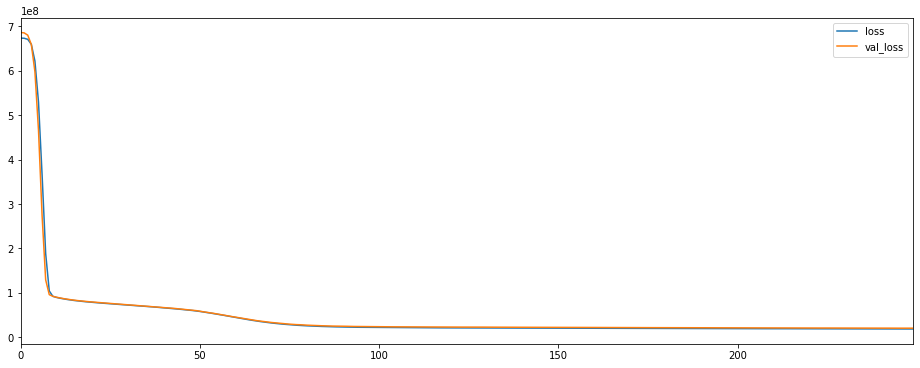

In [178]:
dfLosses.plot(figsize = (16, 6))

Kayıp ve doğrulama kaybı berâber hareket ediyorlar ve belli bir yerden sonra birbirlerine çok yakınlar. Bu da modelin "ezberleme" olarak isimlendirilen, ağırlıkların yalnızca mevcut veri setini en iyileyecek şekilde ayarlanması gibi bir sıkıntının olmadığını gösteriyor.

Ama "epoch" sayısı çok olmuş gibi görünüyor. 

In [180]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [181]:
predicts = model.predict(xTestTransformedValues)

In [182]:
predicts

array([[16252.649],
       [26646.736],
       [16387.451],
       ...,
       [25755.361],
       [21672.266],
       [18027.281]], dtype=float32)

In [189]:
err = mean_absolute_error(yTest,predicts)
print("Ortalama mutlak hatâ : " + str(err))

Ortalama mutlak hatâ : 3261.0222398751566


Modelimizin tahmîn başarısı aslında düşük; daha doğru tahmînler için belki bâzı sütunları çıkarmalıyız, belki bâzı verileri çıkarmalıyız. Ama artık bu çalışmayı bitirmek istiyorum.
Ortalama fiyatımıza ve yaptığımız tahmin hatâsının ortalama fiyata oranına bakalım:

In [194]:
meanPrice = dfWithTransmission.mean()["price"]

print("Araçların ortalama fiyatı (pound) : " + str(round(meanPrice, 2)))
print("Fiyat tahmînindeki sapma miktarı (pound) : " + str(err))
print("Sapma miktarının yüzde cinsinden değeri : " + str(round((err / meanPrice) * 100, 2)))

Araçların ortalama fiyatı (pound) : 24082.33
Fiyat tahmînindeki sapma miktarı (pound) : 3261.0222398751566
Sapma miktarının yüzde cinsinden değeri : 13.54


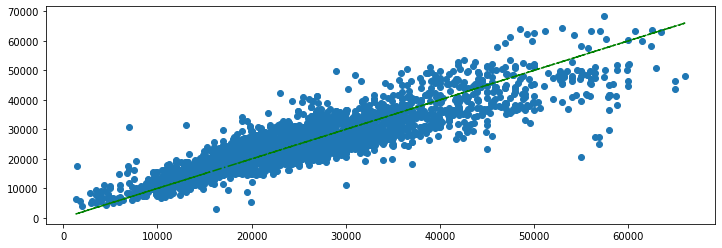

In [188]:
plt.figure(figsize = (12, 4))
plt.scatter(yTest,predicts)
plt.plot(yTest,yTest,"g-.")